In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants


plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True


import Qubits

beta = 200
delta = 40

resolution = 50

In [3]:
def resistive(x, C, omega0, Cg, Z0):
    Z_tot = (1j*x/C)/(x**2-omega0**2+Cg/C * x**2 * (1+1j*x*Cg*Z0)/(1+x**2*Cg**2*Z0**2)) 
    return Z_tot

In [4]:
frequency = np.linspace(5e8,12e9, 200)
C_qubit = 1e-3

T1 = C_qubit* 1/(np.real(resistive(frequency, 1e-13, 5e9, 5e-15, 50)))

T1_ohmic = 1/((frequency**2 * 50* (1e-11)**2)/C_qubit)

T_1_total = 1/(1/T1 + 1/T1_ohmic)

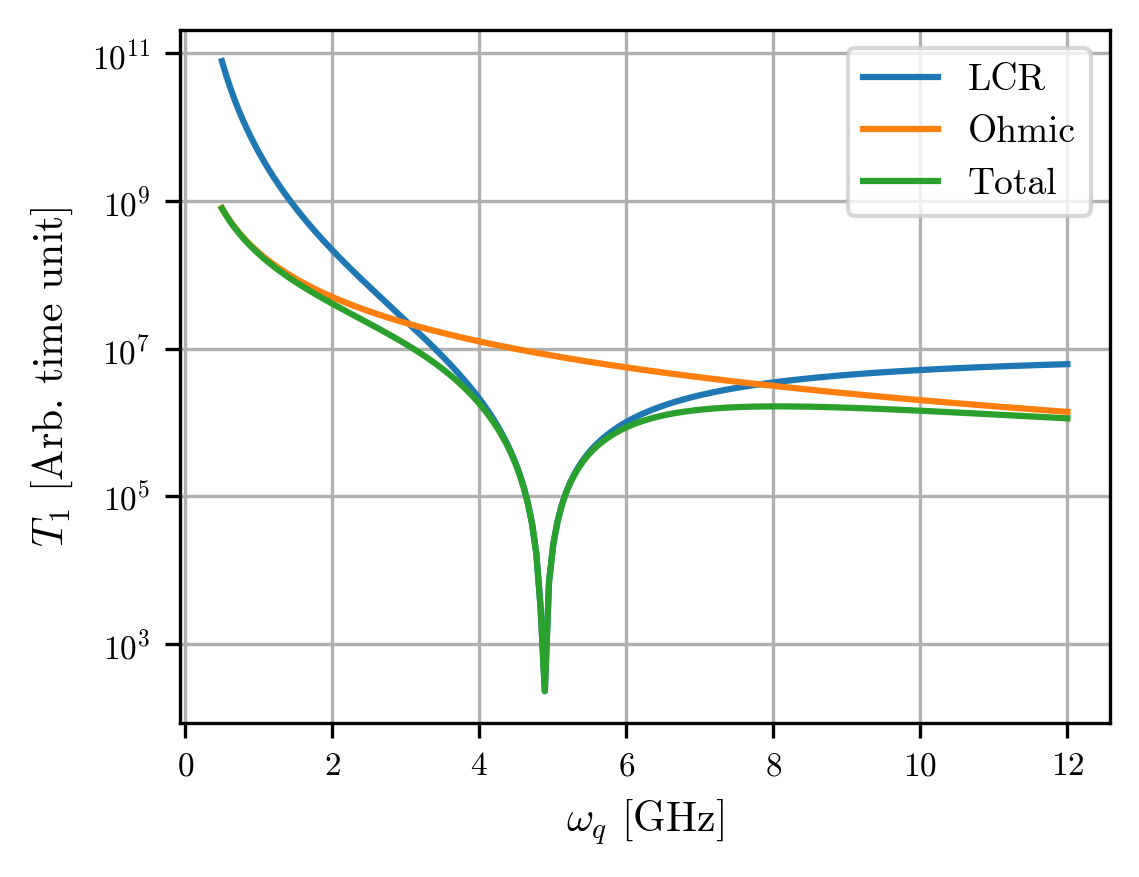

In [5]:
plt.plot(frequency*1e-9, T1*1e9, label="LCR")
plt.plot(frequency*1e-9, T1_ohmic*1e9, label="Ohmic")
plt.plot(frequency*1e-9, T_1_total*1e9, label="Total")
plt.ylabel(r"$T_1$ [Arb. time unit]")
plt.xlabel(r"$\omega_q$ [GHz]")
plt.yscale("log")
plt.legend()

In [6]:
constants.elementary_charge**2/(0.2*constants.hbar)

0.0012170674028939735

In [7]:
def resonator_and_drive(freq, Q, omega_0, Cr, Cg, CJ, R = 50):
    resonator = 1j*freq/Cr*1/(freq**2-omega_0**2+1j*freq*omega_0/Q) - 1/(1j*freq*Cg)

    drive = 1/R - 1/(1j*freq*CJ)

    total_impdedance = 1/(1/resonator + 1/drive)

    return (resonator, drive, total_impdedance)

In [8]:
impedance = resonator_and_drive(frequency, 1e4, 6e9, 1e-9, 5e-15, 1e-15)

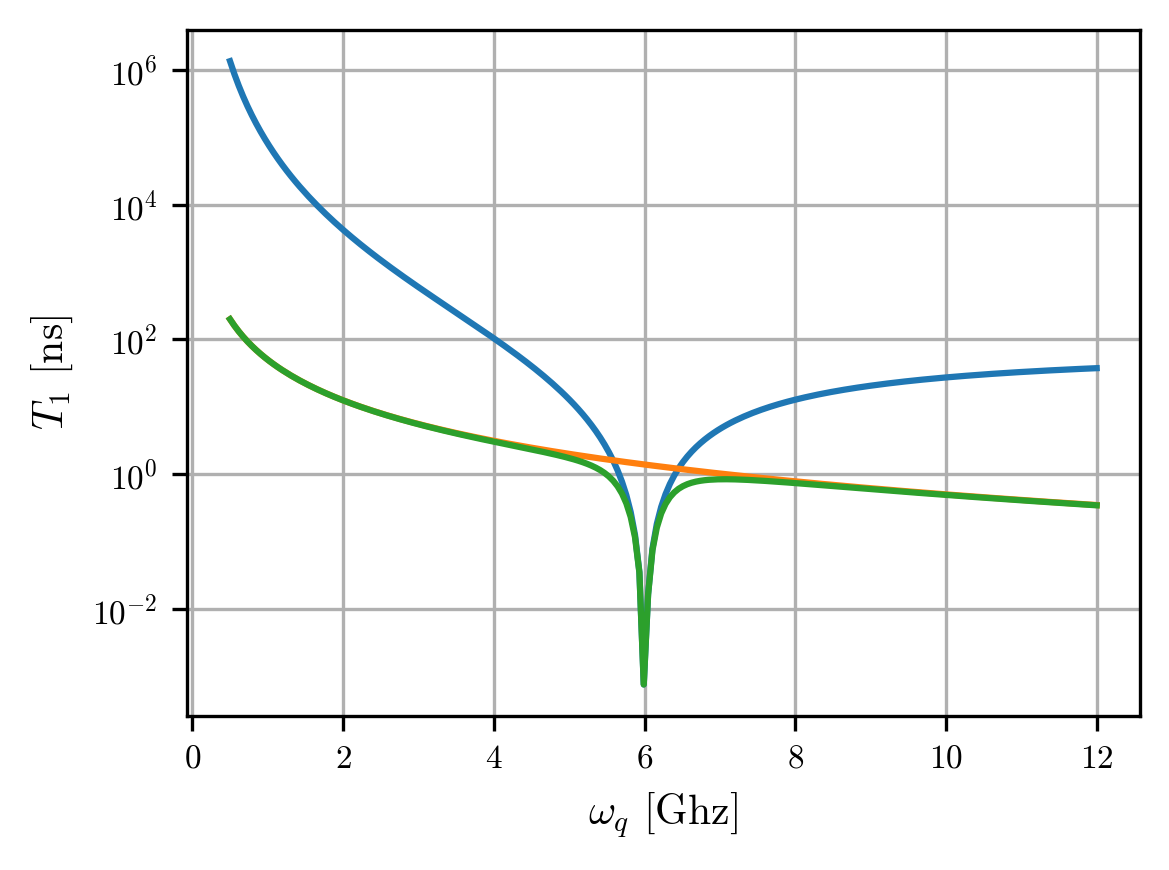

In [20]:
plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance[0]))
plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance[1]))
plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance[2]))
plt.xlabel(r"$\omega_q$ [GHz]")
plt.ylabel(r"$T_1$ [ns]")
plt.yscale("log")
plt.tight_layout()

(0.0, 10.0)

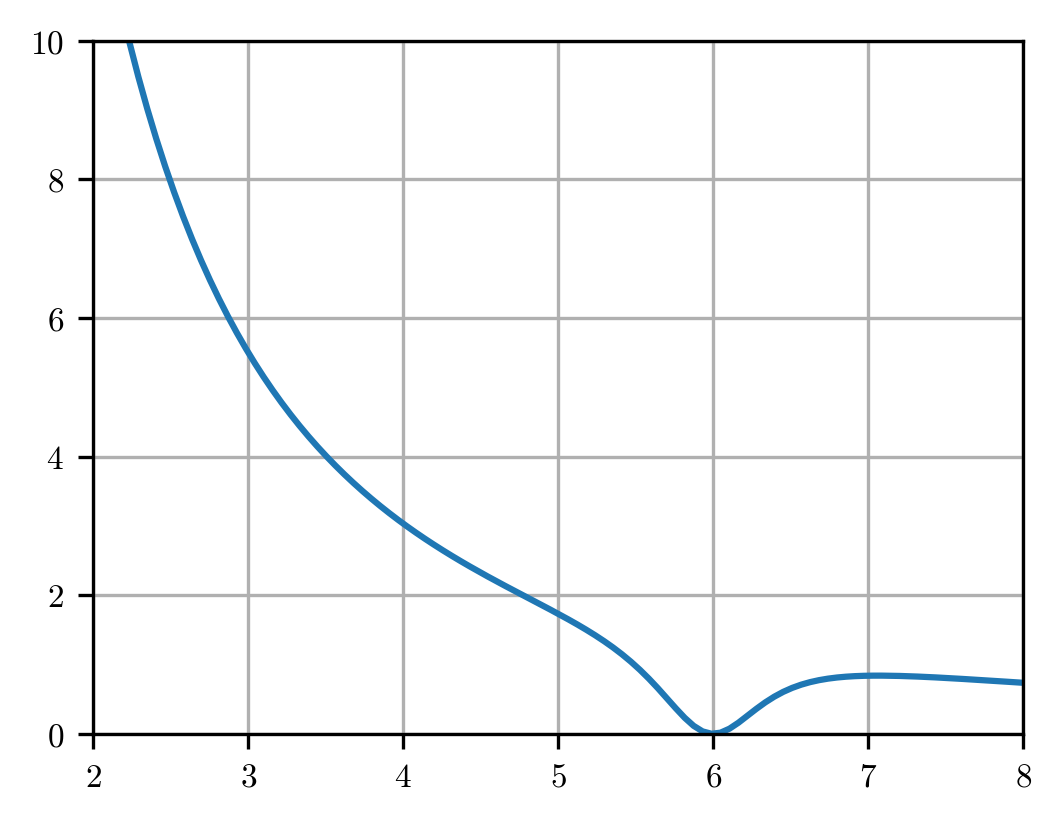

In [16]:
res = 1e-12/np.real(1/impedance[0])
ohmic = 1e-12/np.real(1/impedance[1])


plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance[2]))
#plt.plot(frequency*1e-9, 1/(1/res + 1/ohmic))
#plt.yscale("log")
plt.xlim(2, 8)
plt.ylim(0, 10)

In [22]:
def drive_to_ground(freq, Q, omega_0, Cr, Cg, CJ, CD, R = 50):
    resonator = 1j*freq/Cr*1/(freq**2-omega_0**2+1j*freq*omega_0/Q) - 1/(1j*freq*Cg)

    drive = 1/(1/R - 1j*freq*CD) -1/(1j*freq*CJ)

    total_impdedance = 1/(1/resonator + 1/drive)

    return (resonator, drive, total_impdedance)

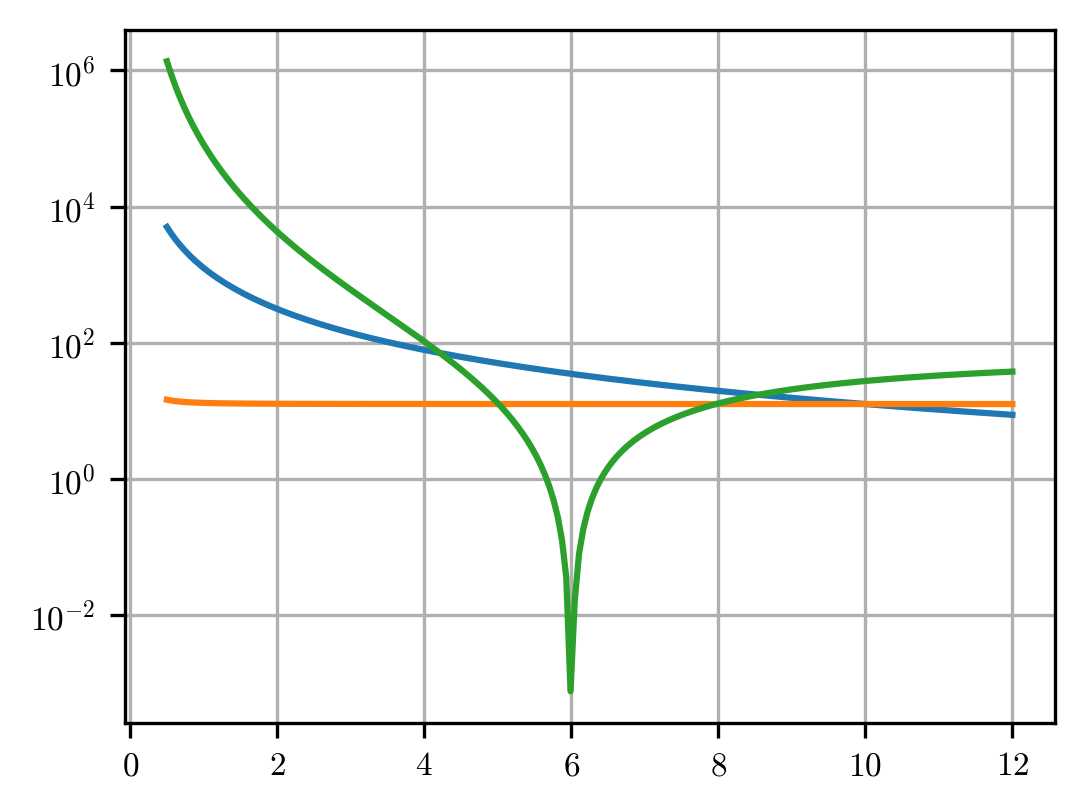

In [63]:
impedance = resonator_and_drive(frequency, 1e4, 6e9, 1e-9, 5e-15, 2e-16)
impedance2 =    drive_to_ground(frequency, 1e4, 6e9, 1e-9, 5e-15, 2e-16, 1e-10)

plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance[1]))
plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance2[1]))
plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance2[0]))
#plt.plot(frequency*1e-9, 1e-12/np.real(1/impedance2[2]))

#plt.xlim(2, 8)
#plt.ylim(0, 10)
plt.yscale("log")